# Ninad Karlekar

# Project Name — Churn Prediction in Telecom Industry using Logistic Regression

## Life cycle of Machine learning Project
- Understanding the Problem Statement
- Data Collection
- Data Checks to perform
- Exploratory data analysis
- Data Pre-Processing
- Choose best model
- Model Training 

## 1) Problem statement
- This project understands how the **Churn** is affected by other variables 

## 2) Data Collection

- Dataset Source - https://github.com/NinadKarlekar/CodeClause/tree/main/Task1_Churn%20Prediction%20in%20Telecom%20Industry%20using%20Logistic%20Regression/Dataset

-------------------------
### 2.1 Import Data and Required Packages

In [355]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.ticker as mtick

# Modelling
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor,AdaBoostRegressor
from sklearn.svm import SVR
from sklearn.linear_model import LinearRegression, Ridge,Lasso
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
from sklearn.model_selection import RandomizedSearchCV
from catboost import CatBoostRegressor
from xgboost import XGBRegressor
import warnings

import warnings as wg
wg.filterwarnings("ignore")

----------------------
### 2.2 Importing datasets

In [356]:
df = pd.read_csv('https://raw.githubusercontent.com/NinadKarlekar/CodeClause/main/Task1_Churn%20Prediction%20in%20Telecom%20Industry%20using%20Logistic%20Regression/Dataset/Telco-Customer-Churn.csv')

In [357]:
df.head()  # Show firest 5 rows

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


## Let's get stastical information about the dataset

In [358]:
#number of rows and columns
df.shape

(7043, 21)

In [359]:
df.describe()

,SeniorCitizen,tenure,MonthlyCharges
count,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692
std,0.368612,24.559481,30.090047
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.750000


### 2.2 Dataset information

- **customerID** -> unique Customer ID
- **gender** -> Whether the customer is a male or a female
- **SeniorCitizen** -> Whether the customer is a senior citizen or not (1, 0)
- **Partner** -> Whether the customer has a partner or not (Yes, No)
- **Dependents** -> Whether the customer has dependents or not (Yes, No)
- **tenure** -> Number of months the customer has stayed with the company
- **PhoneService** -> Whether the customer has a phone service or not (Yes, No)
- **MultipleLines** -> Whether the customer has multiple lines or not (Yes, No, No phone service)
- **InternetService** -> Customer’s internet service provider (DSL, Fiber optic, No)
- **OnlineSecurity** -> Whether the customer has online security or not (Yes, No, No internet service)
- **OnlineBackup** -> Whether the customer has online backup or not (Yes, No, No internet service)
- **DeviceProtection** -> Whether the customer has device protection or not (Yes, No, No internet service)
- **TechSupport** -> Whether the customer has tech support or not (Yes, No, No internet service)
- **StreamingTV** -> Whether the customer has streaming TV or not (Yes, No, No internet service)
- **StreamingMovies** -> Whether the customer has streaming movies or not (Yes, No, No internet service)
- **Contract** -> The contract term of the customer (Month-to-month, One year, Two year)
- **PaperlessBilling** -> Whether the customer has paperless billing or not (Yes, No)
- **PaymentMethod** -> The customer’s payment method (Electronic check, Mailed check, Bank transfer (automatic), Credit card (automatic))
- **MonthlyCharges** -> The amount charged to the customer monthly
- **TotalCharges** -> The total amount charged to the customer
- **Churn** -> Whether the customer churned or not (Yes or No)

In [360]:
# Converting Total Charges to a numerical data type.
df.TotalCharges = pd.to_numeric(df.TotalCharges, errors='coerce')

## 3. Data Checks to perform

- Check Missing values
- Check Duplicates
- Check data type
- Check the number of unique values of each column
- Check statistics of data set
- Check various categories present in the different categorical column

### 3.1 Check Missing values

In [361]:
df.isna().sum()

customerID           0
gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64

### Removing missing values 

In [362]:
#Removing missing values 
df.dropna(inplace = True)

In [363]:
#Remove customer IDs from the data set
df = df.iloc[:,1:]
df.isna().sum()

gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

<b>There are no missing values in the data set</b>

### 3.2 Check Duplicates

In [364]:
df_duplicates = df[df.duplicated()]
print(df_duplicates.shape)

(22, 20)


In [365]:
df.drop_duplicates()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,No,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.50,No
7039,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,Yes,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.90,No
7040,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,No,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.60,Yes


### 3.3 Check data types

In [366]:
df.dtypes

gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges        float64
Churn                object
dtype: object

### 3.4 Checking the number of unique values of each column

In [367]:
df.nunique()

gender                 2
SeniorCitizen          2
Partner                2
Dependents             2
tenure                72
PhoneService           2
MultipleLines          3
InternetService        3
OnlineSecurity         3
OnlineBackup           3
DeviceProtection       3
TechSupport            3
StreamingTV            3
StreamingMovies        3
Contract               3
PaperlessBilling       2
PaymentMethod          4
MonthlyCharges      1584
TotalCharges        6530
Churn                  2
dtype: int64

### 3.5 Check statistics of data set

In [368]:
df.describe()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
count,7032.000000,7032.000000,7032.000000,7032.000000
mean,0.162400,32.421786,64.798208,2283.300441
std,0.368844,24.545260,30.085974,2266.771362
min,0.000000,1.000000,18.250000,18.800000
25%,0.000000,9.000000,35.587500,401.450000
50%,0.000000,29.000000,70.350000,1397.475000
75%,0.000000,55.000000,89.862500,3794.737500
max,1.000000,72.000000,118.750000,8684.800000


## Data Preparation
Converting some binary variables to `0/1`

In [369]:
# Converting Total Charges to a numerical data type.
df.TotalCharges = pd.to_numeric(df.TotalCharges, errors='coerce')
df.isnull().sum()



gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [370]:
#List of variables to map
var_list = ['PhoneService', 'PaperlessBilling', 'Churn', 'Partner', 'Dependents']

#Defining map function
def binary_map(x):
    return x.map({"Yes":1, "No":0})

#Applying functioon to the var_list
df[var_list] = df[var_list].apply(binary_map)

df.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,1,0,1,0,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,1,Electronic check,29.85,29.85,0
1,Male,0,0,0,34,1,No,DSL,Yes,No,Yes,No,No,No,One year,0,Mailed check,56.95,1889.50,0
2,Male,0,0,0,2,1,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,1,Mailed check,53.85,108.15,1
3,Male,0,0,0,45,0,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,0,Bank transfer (automatic),42.30,1840.75,0
4,Female,0,0,0,2,1,No,Fiber optic,No,No,No,No,No,No,Month-to-month,1,Electronic check,70.70,151.65,1


-----------------------------------------

### For categeorical variables with multiple levels, create dudmmy features (one-hot encode)
### Let's convert all the categorical variables into dummy variables

In [371]:
#Let's convert all the categorical variables into dummy variables
df_dummies = pd.get_dummies(df)
df_dummies.head()

,SeniorCitizen,Partner,Dependents,tenure,PhoneService,PaperlessBilling,MonthlyCharges,TotalCharges,Churn,gender_Female,...,StreamingMovies_No,StreamingMovies_No internet service,StreamingMovies_Yes,Contract_Month-to-month,Contract_One year,Contract_Two year,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,0,1,0,1,0,1,29.85,29.85,0,1,...,1,0,0,1,0,0,0,0,1,0
1,0,0,0,34,1,0,56.95,1889.50,0,0,...,1,0,0,0,1,0,0,0,0,1
2,0,0,0,2,1,1,53.85,108.15,1,0,...,1,0,0,1,0,0,0,0,0,1
3,0,0,0,45,0,0,42.30,1840.75,0,0,...,1,0,0,0,1,0,1,0,0,0
4,0,0,0,2,1,1,70.70,151.65,1,1,...,1,0,0,1,0,0,0,0,1,0


## 4. Exploring Data ( Visualization )

### Get Correlation of "Churn" with other variables:

<AxesSubplot: >

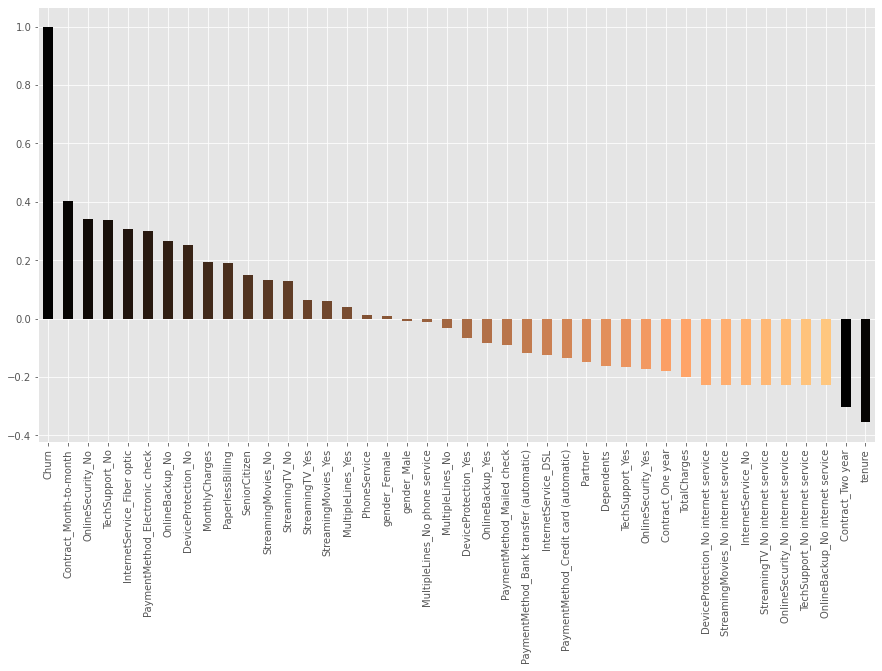

In [372]:
# set the plot style to "ggplot"
plt.style.use('ggplot')
plt.figure(figsize=(15,8))
df_dummies.corr()['Churn'].sort_values(ascending = False).plot(kind='bar', color = plt.cm.copper(np.linspace(0, 1, 40)))


### Gender Distribution of Customers 

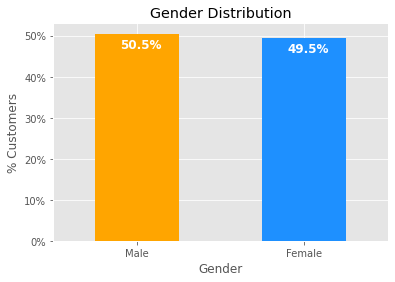

In [373]:
colors = ['#FFA500', '#1E90FF']

ax = (df['gender'].value_counts()*100.0 /len(df)).plot(kind='bar',stacked = True,rot = 0,color = colors)
ax.yaxis.set_major_formatter(mtick.PercentFormatter())
ax.set_ylabel('% Customers')
ax.set_xlabel('Gender')
ax.set_ylabel('% Customers')
ax.set_title('Gender Distribution')

# create a list to collect the plt.patches data
totals = []

# find the values and append to list
for i in ax.patches:
    totals.append(i.get_width())

# set individual bar lables using above list
total = sum(totals)

for i in ax.patches:
    # get_width pulls left or right; get_y pushes up or down
    ax.text(i.get_x()+.15, i.get_height()-3.5, \
            str(round((i.get_height()/total), 1))+'%',
            fontsize=12,
            color='white',
           weight = 'bold')

### Senior Citizen Distribution - Pie Chart with Percentage Labels

Text(0.5, 1.0, '% of Senior Citizens')

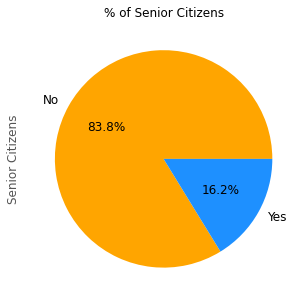

In [374]:

ax = (df['SeniorCitizen'].value_counts() * 100.0 / len(df)).plot.pie(
    autopct='%.1f%%',
    labels=['No', 'Yes'],
    figsize=(5, 5),
    fontsize=12,
    colors=colors
)

ax.yaxis.set_major_formatter(mtick.PercentFormatter())
ax.set_ylabel('Senior Citizens', fontsize=12)
ax.set_title('% of Senior Citizens', fontsize=12)


--------------------
### Stacked bar chart showing the percentage of customers with/without dependents based on whether they have a partner.

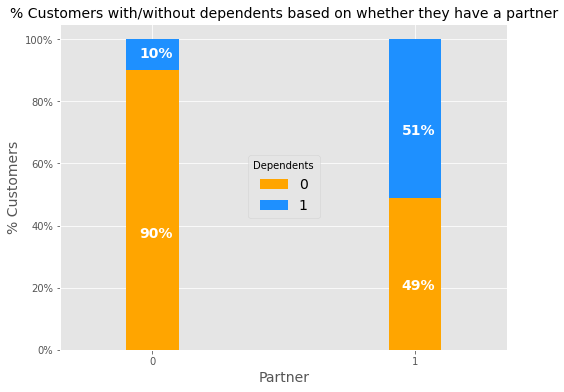

In [375]:
partner_dependents = df.groupby(['Partner', 'Dependents']).size().unstack()

ax = (partner_dependents.T * 100.0 / partner_dependents.T.sum()).T.plot(kind='bar',
                                                                        width=0.2,
                                                                        stacked=True,
                                                                        rot=0,
                                                                        figsize=(8, 6),
                                                                        color=colors)
ax.yaxis.set_major_formatter(mtick.PercentFormatter())
ax.legend(loc='center', prop={'size': 14}, title='Dependents', fontsize=14)
ax.set_ylabel('% Customers', size=14)
ax.set_title('% Customers with/without dependents based on whether they have a partner', size=14)
ax.xaxis.label.set_size(14)

# Code to add the data labels on the stacked bar chart
for p in ax.patches:
    width, height = p.get_width(), p.get_height()
    x, y = p.get_xy()
    ax.annotate('{:.0f}%'.format(height), (p.get_x() + .25 * width, p.get_y() + .4 * height),
                color='white',
                weight='bold',
                size=14)

---------------------------------

### Histogram showing the distribution of customer tenure in months for the telecom dataset. The x-axis represents tenure in months, and the y-axis represents the number of customers.

Text(0.5, 1.0, '# of Customers by their tenure')

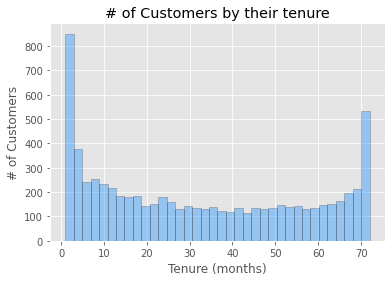

In [376]:
# Creating a histogram of customer tenure
ax = sns.distplot(df['tenure'], hist=True, kde=False, 
             bins=int(180/5), color=colors[1], 
             hist_kws={'edgecolor':'black'},
             kde_kws={'linewidth': 4})

# Adding labels and title to the plot
ax.set_ylabel('# of Customers')
ax.set_xlabel('Tenure (months)')
ax.set_title('# of Customers by their tenure')

### Bar chart showing the number of customers by contract type in the telecom dataset.

Text(0.5, 1.0, '# of Customers by Contract Type')

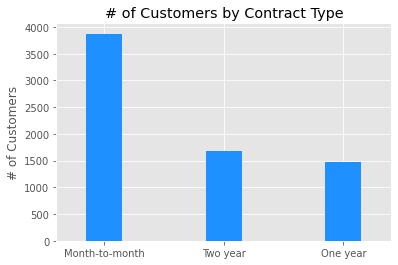

In [377]:
ax = df['Contract'].value_counts().plot(kind='bar', rot=0, width=0.3, color='#1E90FF')
ax.set_ylabel('# of Customers')
ax.set_title('# of Customers by Contract Type')


----------------------------------
## Preparing X and Y variables

In [378]:
X = df.drop(['Churn'], axis=1)
X.head()


,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges
0,Female,0,1,0,1,0,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,1,Electronic check,29.85,29.85
1,Male,0,0,0,34,1,No,DSL,Yes,No,Yes,No,No,No,One year,0,Mailed check,56.95,1889.50
2,Male,0,0,0,2,1,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,1,Mailed check,53.85,108.15
3,Male,0,0,0,45,0,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,0,Bank transfer (automatic),42.30,1840.75
4,Female,0,0,0,2,1,No,Fiber optic,No,No,No,No,No,No,Month-to-month,1,Electronic check,70.70,151.65


In [379]:
#Putting response variable to Y
y = df['Churn']
y.head()

0    0
1    0
2    1
3    0
4    1
Name: Churn, dtype: int64

In [380]:
# Create Column Transformer with 3 types of transformers
num_features = X.select_dtypes(exclude="object").columns
cat_features = X.select_dtypes(include="object").columns

from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer

numeric_transformer = StandardScaler()
oh_transformer = OneHotEncoder()

preprocessor = ColumnTransformer(
    [
        ("OneHotEncoder", oh_transformer, cat_features),
         ("StandardScaler", numeric_transformer, num_features),        
    ]
)

In [381]:
X = preprocessor.fit_transform(X)


In [382]:
X.shape


(7032, 41)

## Train-Test Split

In [383]:
# separate dataset into train and test
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=42)
X_train.shape, X_test.shape

((5625, 41), (1407, 41))

-----------------------------

## 6. Choosing best model

## After going through the above EDA we wil develop some predictive models and compare them.

In [384]:
def evaluate_model(true, predicted):
    mae = mean_absolute_error(true, predicted)
    mse = mean_squared_error(true, predicted)
    rmse = np.sqrt(mean_squared_error(true, predicted))
    r2_square = r2_score(true, predicted)
    return mae, rmse, r2_square

In [385]:
models = {
    "LogisticRegression Regression": LogisticRegression(),
    "Random Forest Regressor": RandomForestRegressor(),
    "XGBRegressor": XGBRegressor(), 
    "AdaBoost Regressor": AdaBoostRegressor()
}
model_list = []
r2_list =[]

for i in range(len(list(models))):
    model = list(models.values())[i]
    model.fit(X_train, y_train) # Train model

    # Make predictions
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)
    
    # Evaluate Train and Test dataset
    model_train_mae , model_train_rmse, model_train_r2 = evaluate_model(y_train, y_train_pred)

    model_test_mae , model_test_rmse, model_test_r2 = evaluate_model(y_test, y_test_pred)

    
    print(list(models.keys())[i])
    model_list.append(list(models.keys())[i])
    
    print('Model performance for Training set')
    print("- Root Mean Squared Error: {:.4f}".format(model_train_rmse))
    print("- Mean Absolute Error: {:.4f}".format(model_train_mae))
    print("- R2 Score: {:.4f}".format(model_train_r2))

    print('----------------------------------')
    
    print('Model performance for Test set')
    print("- Root Mean Squared Error: {:.4f}".format(model_test_rmse))
    print("- Mean Absolute Error: {:.4f}".format(model_test_mae))
    print("- R2 Score: {:.4f}".format(model_test_r2))
    r2_list.append(model_test_r2)
    
    print('='*35)
    print('\n')

LogisticRegression Regression
Model performance for Training set
- Root Mean Squared Error: 0.4372
- Mean Absolute Error: 0.1911
- R2 Score: 0.0206
----------------------------------
Model performance for Test set
- Root Mean Squared Error: 0.4602
- Mean Absolute Error: 0.2118
- R2 Score: -0.0853


Random Forest Regressor
Model performance for Training set
- Root Mean Squared Error: 0.1465
- Mean Absolute Error: 0.1008
- R2 Score: 0.8901
----------------------------------
Model performance for Test set
- Root Mean Squared Error: 0.3863
- Mean Absolute Error: 0.2771
- R2 Score: 0.2355


XGBRegressor
Model performance for Training set
- Root Mean Squared Error: 0.1948
- Mean Absolute Error: 0.1315
- R2 Score: 0.8055
----------------------------------
Model performance for Test set
- Root Mean Squared Error: 0.3997
- Mean Absolute Error: 0.2847
- R2 Score: 0.1812


AdaBoost Regressor
Model performance for Training set
- Root Mean Squared Error: 0.3762
- Mean Absolute Error: 0.3086
- R2 Sc

In [386]:
pd.DataFrame(list(zip(model_list, r2_list)), columns=['Model Name', 'R2_Score']).sort_values(by=["R2_Score"],ascending=False)

,Model Name,R2_Score
3,AdaBoost Regressor,0.238820
1,Random Forest Regressor,0.235518
2,XGBRegressor,0.181245
0,LogisticRegression Regression,-0.085272


-------------------
## 7. Model Training

##  We will develop AdaBoost Regressor,Random Forest, XG Boost, Logistic Regression

## 1. AdaBoost Regressor

In [393]:
# AdaBoost Algorithm
from sklearn.ensemble import AdaBoostClassifier
model = AdaBoostClassifier()
# n_estimators = 50 (default value) 
# base_estimator = DecisionTreeClassifier (default value)
model.fit(X_train,y_train)
preds = model.predict(X_test)
score = metrics.accuracy_score(y_test, preds)
print("Accuracy of the AdaBoost Regressor model is %.2f%%" % (score * 100))

Accuracy of the AdaBoost Regressor model is 81.24%



<div class="alert alert-block alert-info"> <h3>📌Result:</h3> <br>
<p style='color:black;'>
    
- ### Accuracy of the AdaBoost Regressor model is **`81.24%`**
    
</p>
</div>

----------------------------------
## 2. Random Forest Regressor

In [394]:
from sklearn.ensemble import RandomForestClassifier
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=101)
model_rf = RandomForestClassifier(n_estimators=1000 , oob_score = True, n_jobs = -1,
                                  random_state =50, max_features = "auto",
                                  max_leaf_nodes = 30)
model_rf.fit(X_train, y_train)

# Make predictions
preds = model_rf.predict(X_test)
score = metrics.accuracy_score(y_test, preds)
print("Accuracy of the Random Forest Regressor model is %.2f%%" % (score * 100))

Accuracy of the Random Forest Regressor model is 81.02%


<div class="alert alert-block alert-info"> <h3>📌Result:</h3> <br>
<p style='color:black;'>

- ### Accuracy of the Random Forest Regressor model is **`81.02%`**
    
</p>
</div>


----------------------------
## 3. XG Boost

In [395]:
from xgboost import XGBClassifier
model = XGBClassifier()
model.fit(X_train, y_train)
preds = model.predict(X_test)
score = metrics.accuracy_score(y_test, preds)
print("Accuracy of the XG Boost model is %.2f%%" % (score * 100))

Accuracy of the XG Boost model is 78.46%



<div class="alert alert-block alert-info"> <h3>📌Result:</h3> <br>
<p style='color:black;'>

- ### Accuracy of the XG Boost is **`78.46%`**
    
</p>
</div>


-----------------------------------

### 4. Logistic Regresion

In [396]:
y = df_dummies['Churn'].values
X = df_dummies.drop(columns = ['Churn'])

# Scaling all the variables to a range of 0 to 1
from sklearn.preprocessing import MinMaxScaler
features = X.columns.values
scaler = MinMaxScaler(feature_range = (0,1))
scaler.fit(X)
X = pd.DataFrame(scaler.transform(X))
X.columns = features

In [397]:
# Running logistic regression model
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
result = model.fit(X_train, y_train)


In [398]:
from sklearn import metrics
y_pred = model.predict(X_test)
score = metrics.accuracy_score(y_test, prediction_test)*100
print(" Accuracy of the model is %.2f" %score)

 Accuracy of the model is 81.02



<div class="alert alert-block alert-info"> <h3>📌Result:</h3> <br>
<p style='color:black;'>

- ### Accuracy of the Logistic Regresion is **`81.02%`**
    
</p>
</div>


--------------------------------

<div class="alert alert-block alert-info" style='background-color: #d4fad2;'>
    <h3 style='font-size: 21px;'>📌Conclusion:</h3> 
    <br>
    <p style='font-size: 16px; color:black;'>
        - Interestingly, <strong>AdaBoost</strong> performed the best among all the techniques, achieving an accuracy of <strong><i>81.24%</i></strong>. 
        <br>
        - <strong>AdaBoost</strong> is a powerful ensemble method that combines weak learners to create a strong model. 
        <br>
        - Its ability to adapt to the data and correct for errors in each iteration makes it a reliable model for classification/regression tasks.
    </p>
</div>
